In [1]:
import pandas as pd
import pickle
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


##### Data Cleaning   

In [2]:
columns_to_remove = ['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels = columns_to_remove, axis = 1, inplace = True)

In [3]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [4]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [5]:
# Keeping only consistent teams

consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [6]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [12]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [7]:
# Remove first 5 overs data in every match

df = df[df['overs'] >= 5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [8]:
# Convert the column 'data' from string into datetime object

from datetime import datetime
df['date'] = df['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

##### Data Preprocessing

In [9]:
# Convert categorical features using OneHotEncoding 

encoded_df = pd.get_dummies(data = df, columns = ['bat_team', 'bowl_team'])
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [11]:
# Rearranging columns

encoded_df  = encoded_df[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]

In [12]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,total
32,2008-04-18,61,0,5.1,59,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
33,2008-04-18,61,1,5.2,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
34,2008-04-18,61,1,5.3,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
35,2008-04-18,61,1,5.4,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
36,2008-04-18,61,1,5.5,58,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222


In [21]:
# Splitting the data into train and test set

X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

type(X_test)

pandas.core.frame.DataFrame

In [41]:
# Splitting the data into train and test set

# X_train = encoded_df.iloc[:,:-1][encoded_df['date'].dt.year <= 2016].values
# X_test  = encoded_df.iloc[:,:-1][encoded_df['date'].dt.year >= 2017].values


# Y_train = encoded_df.iloc[:,-1][encoded_df['date'].dt.year <= 2016].values
# Y_test  = encoded_df.iloc[:,-1][encoded_df['date'].dt.year >= 2017].values
# type(X_test)

numpy.ndarray

In [ ]:
## above traintest date is in a type of numpy array so that we are not
## remove date columns so that we use another tecnique to train test split 

In [23]:
# Remove the Date columns

X_train.drop(labels = 'date', axis = 1, inplace = True)
X_test.drop(labels = 'date', axis = 1, inplace = True)

Y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
Y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

##### Model Building

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [36]:
# Create Pickle file for the Classifier
filename = ' First-innings-score-lr-model.pkl'
pickle.dump(lr, open(filename,'wb'))

##### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,135,40,45,50,55,17,73]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train,Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2765e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61331e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46773e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49295e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43188e-18): result may not be accurate.
  return linal

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 135, 40, 45, 50, 55, 17, 73]},
             scoring='neg_mean_squared_error')

In [27]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 135}
-327.7900122672364


In [28]:
prediction = ridge_regressor.predict(X_test)

<IPython.core.display.Javascript object>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

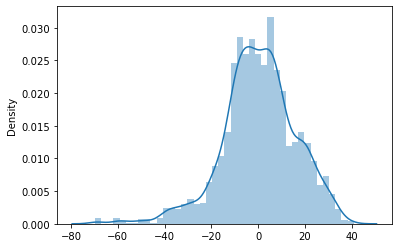

In [29]:
# Visualization

import seaborn as sn
sns.distplot(Y_test - prediction)

##### Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,135,40,45,50,55,17,73]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train,Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4243844.681240149, tolerance: 2529.9556965945626
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4463375.154589264, tolerance: 2547.0380710286627
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4498679.878238455, tolerance: 2667.8126904366463
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 135, 40, 45, 50, 55, 17, 73]},
             scoring='neg_mean_squared_error')

<IPython.core.display.Javascript object>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

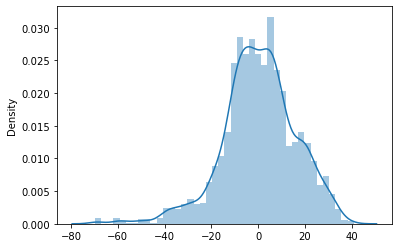

In [33]:
sns.distplot(Y_test - prediction)